### Problem 1.1 - Read and Display Image
First we load the image usin OpenCV.
Since OpenCV reads images in BGR format, we converted it to RGB to display properly with matplotlib.

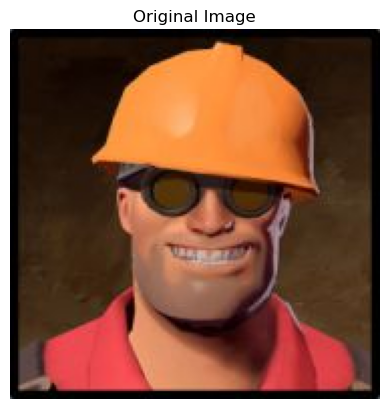

In [1]:
#PROBLEM 1.1 READ AND DISPLAY ORIGINAL IMAGE

import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import random

#READ IMAGE 
img = cv2.imread('images/tf2_engineer.jpg')

#IMAGE CONVERTING BGR TO RGB FORMAT
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#SHOWING ORIGINAL IMAGE
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

### Problem 1.2 - Center Pixel Value
In here, We calculated center of the image using width and height.
We calculated center but we have still BGR format so we are converting it rgb.BRG(Blue, Green, Red) its converting it to RGB(Red,Green,Blue).
Then printing the results.

In [2]:
#PROBLEM 1.2 FIND THE CENTRE OF THE IMAGE AND PRINT INTENSITY VALUE AT THE CENTER

#FOR CENTER WE NEED HEIGHT AND WIDTH
height, width, _ = img.shape

#X and Y coordinates for the image center
y = height // 2
x = width // 2

center_bgr = img[x,y] #CENTER PIXEL BGR
center_rgb = center_bgr[::-1] #CONVERTING BGR TO RGB  

print(f"Image Size: {width}x{height}")
print(f"Coordinates of Center: ({x}, {y})")
print(f"Center RGB Value: {center_rgb}")

Image Size: 184x184
Coordinates of Center: (92, 92)
Center RGB Value: [172  92  67]


### Problem 1.3 - Rectangle on the Center
 First we are defining size of the rectangle. 
 Then, using the center point we defined before, we calculate the top_left and bottom_right values that will bring this rectangle to the center.
 After that we are taking our image's copy to img_with_rect variable.
 Than drawing it with cv2.rectangle.
 Again OpenCV uses BGR format so we have to convert it.
 After the convertion we are displaying.

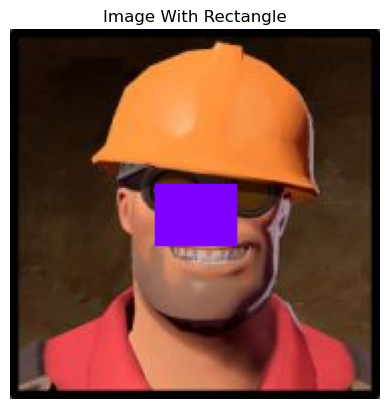

In [3]:
#PROBLEM 1.3 PLACE A RECTANGULAR COLOUR PATCH CENTRE OF THE IMAGE

#Define rectangle height and width
rect_height = 30
rect_width = 40

#We are taking center of the image and making it rectangle's center. 
top_left = (x - rect_width // 2, y - rect_height // 2)
bottom_right = (x + rect_width // 2, y + rect_height // 2)

#BGR COLOUR
rect_color_bgr = (255, 0, 128)

#Drawing rectangle to the copy of our image
img_with_rect = img.copy()
cv2.rectangle(img_with_rect, top_left, bottom_right, rect_color_bgr, thickness=-1)

#Converting image to RGB from BGR
img_rect_rgb = cv2.cvtColor(img_with_rect, cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img_rect_rgb)
plt.title('Image With Rectangle')
plt.axis('off')
plt.show()

### Problem 2.1 - Load Grayscale Image
We are doing same things but with one difference using cv2.IMREAD_GRAYSCALE we got the image with only 0 to 255 brightness value. So it doesnt have colur info.


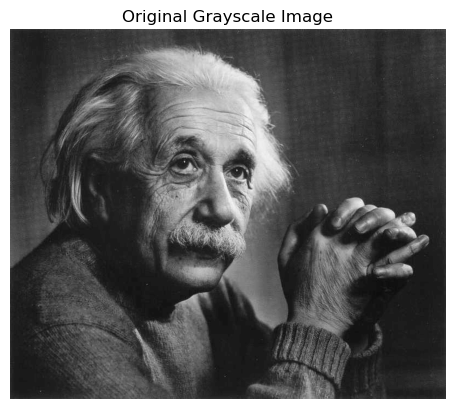

In [4]:
#PROBLEM 2.1 Read and display the original image in grayscale. 

#READING IMAGE IN GRAYSCALE FORMAT
img2 = cv2.imread('images/einstein.tif',cv2.IMREAD_GRAYSCALE)

#Display Image
plt.imshow(img2, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

### Problem 2.2 - Negative Image
To get the negative I subtracted the grayscale pixel values from 255.
This inverts the image so dark places becomes lighter.

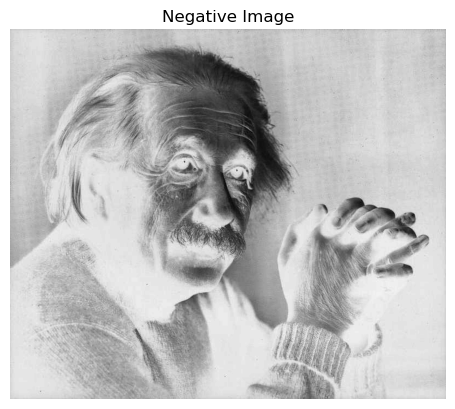

In [5]:
#PROBLEM 2.2 Find the negative of the input image. 
# Creates the negative of the image by inverting pixel values.
img2_neg = 255 - img2

#PROBLEM 2.3 Displaying Negative Image
#Display Image
plt.imshow(img2_neg, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show() 

### Problem 2.4 - Pixel Comparison
First we are taking height and width values. 
With that values it creates random x,y coordinates and saves it in random_pixels array. After that we are displaying it.

In [6]:
#PROBLEM 2.4 
height, width = img2.shape
random_pixels = [(random.randint(0, height-1), random.randint(0,width-1)) for _ in range(5)]

print("Pixel Values - Original vs Negative:")
for (y, x) in random_pixels:
    original_val = img2[y, x]
    negative_val = img2_neg[y, x]
    print(f"Pixel ({y},{x}): Original = {original_val}, Negative = {negative_val}")


Pixel Values - Original vs Negative:
Pixel (486,471): Original = 118, Negative = 137
Pixel (64,45): Original = 99, Negative = 156
Pixel (234,104): Original = 111, Negative = 144
Pixel (456,496): Original = 98, Negative = 157
Pixel (5,223): Original = 107, Negative = 148


### Problem 3.1 - Read Grayscale Image 
We are doing same things first reading it with grayscale than displaying.

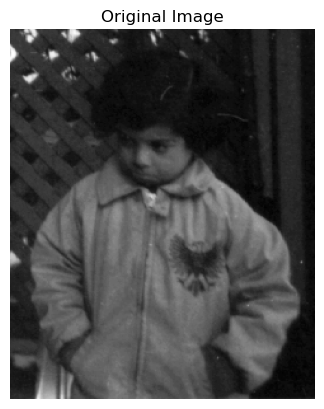

In [7]:
#PROBLEM 3.1 Read and display the original image in grayscale.

#READING IMAGE IN GRAYSCALE FORMAT 
img3 = cv2.imread('images/pout.tif', cv2.IMREAD_GRAYSCALE)

#Displaying Image
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Problem 3.2 - Log Transform
In here we are going to apply log transformation to the image. This makes details more noticable in darker places by expanding their intensity range. First we are taking imge as a float. Because we are gonna make logarithmic calculations. With float our calculations will be more correct. Than we are taking a c constant value for logarithmic convertion. After the convertion we have to normalize it because pixels can be less than zero and bigger than 255 so we used cv2.normalize function. After that image's type is still float with uint8 function we are making sure our every pixel is between 0-255 and integer.

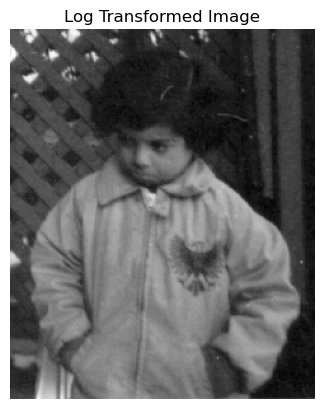

In [8]:
#PROBLEM 3.2 APPLY LOG TRANSFORM

img3_float = img3.astype(np.float32)

#Defining Scaling Factor
c = 255 / np.log(1 + np.max(img3_float))
#Here we are making logaritmic convertion.
log_img = c * np.log1p(img3_float)

#Normalization
log_img_normalized = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
log_img_uint8 = np.uint8(log_img_normalized)

plt.imshow(log_img_uint8, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

### Problem 3.3 - Inverse Log on Original Image
Now we will do inverse logarithmic transformation to image. This adjustes brightness, contrast and dynamic range. First we perform the inverse log conversion using np.expm1 function with the float version of the image and c constant that we calculated before. After that we are making normalization and converting to integer with same reasons before and displaying.

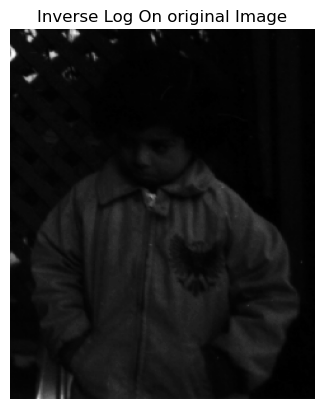

In [9]:
#PROBLEM 3.3 Inverse log transform on original image

inv_log_img = np.expm1(img3_float / c) 

#Normalization
inv_log_img_normalized = cv2.normalize(inv_log_img, None, 0, 255, cv2.NORM_MINMAX)
inv_log_img_uint8 = np.uint8(inv_log_img_normalized)

#Displaying
plt.imshow(inv_log_img_uint8, cmap='gray')
plt.title('Inverse Log On original Image')
plt.axis('off')
plt.show()

### Problem 3.4 Inverse log on Log-Transformed Image
This time we are making inverse log on log-transformed image. The goal is reversing the log transformation and restoring the image to the original version. 

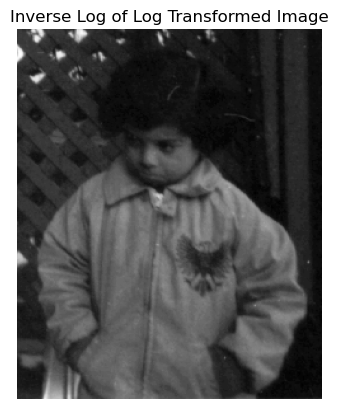

In [10]:
#PROBLEM 3.4 Inverse log on log-transformed image

#Inverse log transformation 
inv_log_of_log = np.expm1(log_img / c)

#Normalizing
inv_log_of_log_norm = cv2.normalize(inv_log_of_log, None, 0, 255, cv2.NORM_MINMAX)
inv_log_of_log_uint8 = np.uint8(inv_log_of_log_norm)

#Displaying
plt.imshow(inv_log_of_log_uint8, cmap='gray')
plt.title('Inverse Log of Log Transformed Image')
plt.axis('off')
plt.show()


### Problem 4.1 Read and Display image in greyscale
Just like we did before first reading image than displaying it.

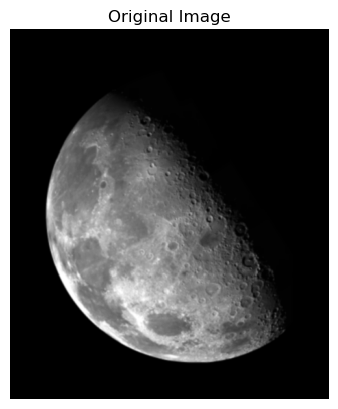

In [11]:
#PROBLEM 4.1 Read and Display image in greyscale

#Read Image in GreyScale
img4 = cv2.imread('images/moon.tif', cv2.IMREAD_GRAYSCALE)

#Displaying Image
plt.imshow(img4, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


### PROBLEM 4.2 - Unsharp Masking in Spatial Domain
It provides sharper view by highlighting the details in the image. First we are bluring the image with GaussianBlur function for soft version of the image. This blured version named as unsharp mask. Than we substract blurred from image. This process brings out the edges and high-frequency details. At the end sharpened image is equal original + mask * k(sharpening factor).

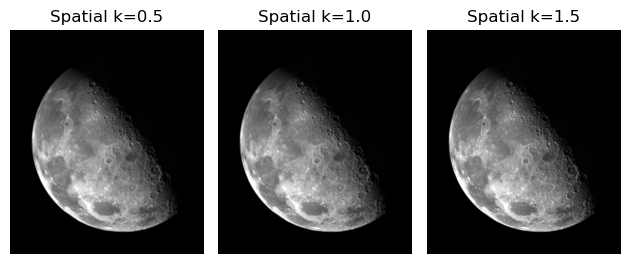

In [12]:
# PROBLEM 4.2 - Unsharp Masking in Spatial Domain

# Defining Unsharp Masking Function 
def unsharp_spatial(image, k):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    mask = cv2.subtract(image, blurred)
    sharp = cv2.addWeighted(image, 1.0, mask, k, 0)
    return sharp

k_values = [0.5, 1.0, 1.5]
spatial_results = [unsharp_spatial(img4, k) for k in k_values]

# Show results
for i, (res, k) in enumerate(zip(spatial_results, k_values)):
    plt.subplot(1, 3, i+1)
    plt.imshow(res, cmap='gray')
    plt.title(f'Spatial k={k}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### PROBLEM 4.3 – Unsharp masking in frequency domain
We first convert the image into frequency domain by Fourier Transform instead of blurring directly. We create a high-pass filter which preserves edges and fine details and eliminates smooth regions. We apply the filter and multiply it by a factor `k` (same for spatial version). We convert the result into normal image domain by inverse Fourier transform. We get a sharpened image finally by reinforcing high-frequency details into frequency domain.

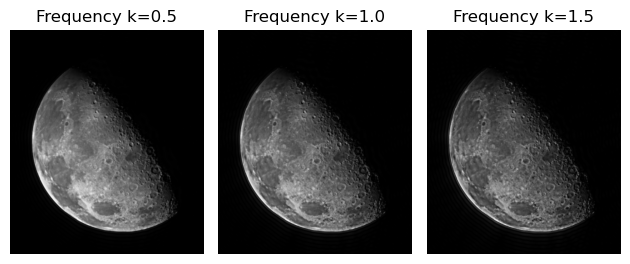

In [13]:
# PROBLEM 4.3 - Frequency Domain Unsharp Masking

def create_high_pass_filter(shape, D0):
    
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance > D0:
                filter_mask[i, j] = 1
    return filter_mask

def apply_frequency_unsharp(image, k, D0):
   
    #Fourier transform
    f = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f)

    #Create high-pass filter
    hp_filter = create_high_pass_filter(image.shape, D0)

    #Apply unsharp mask filter: (1 + k * high_pass_filter)
    unsharp_mask = 1 + k * hp_filter
    filtered = f_shifted * unsharp_mask

    #Inverse Fourier transform to go back to image
    f_inverse = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_inverse)

    #Convert to real and normalize
    img_back = np.abs(img_back)
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    return img_back.astype(np.uint8)

#Now apply for different k values
D0 = 30  # filter size
k_values = [0.5, 1.0, 1.5]
frequency_results = [apply_frequency_unsharp(img4, k, D0) for k in k_values]

# Display results
for i, result in enumerate(frequency_results):
    plt.subplot(1, 3, i+1)
    plt.imshow(result, cmap='gray')
    plt.title(f'Frequency k={k_values[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### PROBLEM 4.4 - Spatial vs Frequency Comparison

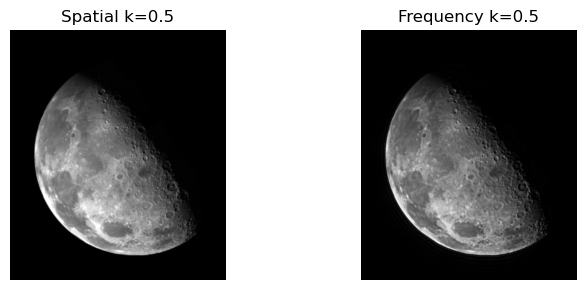

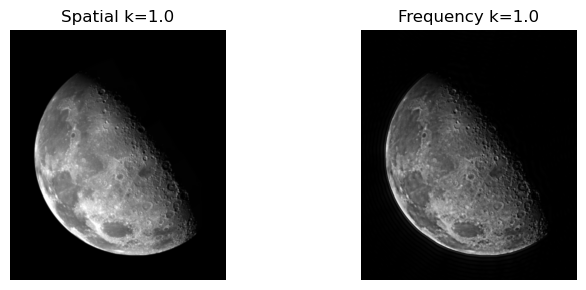

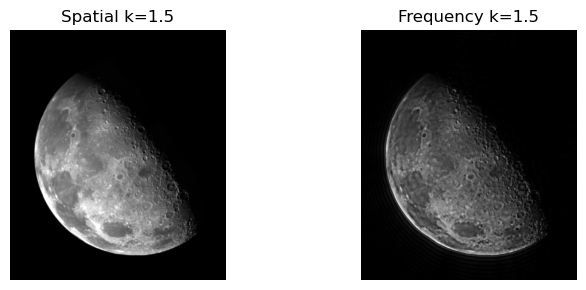

In [14]:
for i, k in enumerate(k_values):
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    plt.imshow(spatial_results[i], cmap='gray')
    plt.title(f'Spatial k={k}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(frequency_results[i], cmap='gray')
    plt.title(f'Frequency k={k}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

### PROBLEM 5.1 - Read and display the original PCB image

Reading and Displaying Image same as before.

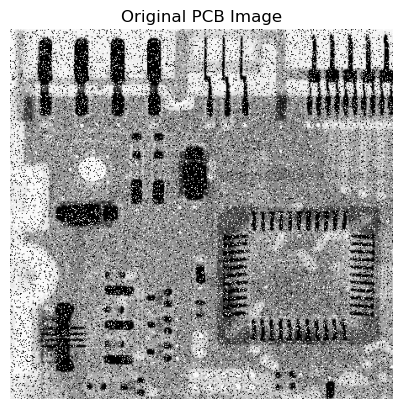

In [15]:
# PROBLEM 5.1 - Read and display the original PCB image

img5 = cv2.imread('images/pcb.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(img5, cmap='gray')
plt.title('Original PCB Image')
plt.axis('off')
plt.show()

# PROBLEM 5.2 - Check noise type using histogram
At the image, you can see some random black and white pixels that don't fit the surrounding area. These spots are usually sharp and isolated.
Also, in the histogram, there are peaks near 0 and 255, which means there are  a lot of very dark and very bright pixels. This usually means salt-and-pepper noise.

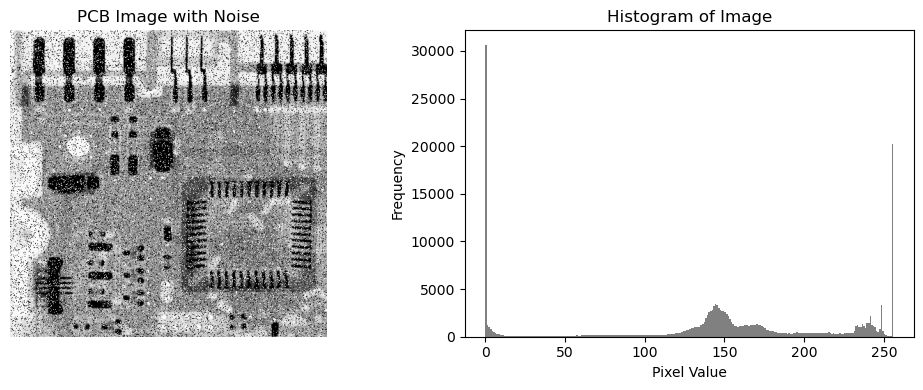

In [16]:
# PROBLEM 5.2 - Check noise type using histogram

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title("PCB Image with Noise")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img5.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram of Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### PROBLEM 5.3 - Noise Removal with Median Filter

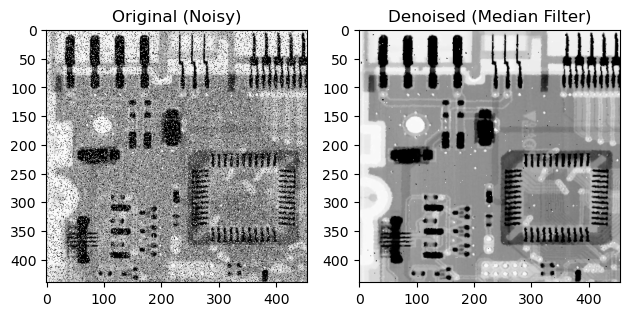

In [17]:
denoised_img = cv2.medianBlur(img5, 3)

plt.subplot(1, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title('Original (Noisy)')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised (Median Filter)')

plt.tight_layout()
plt.show()

### PROBLEM 6.1 - Read and Display Image in Grayscale 

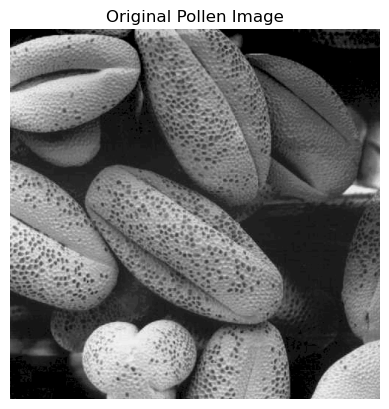

In [18]:
img6 = cv2.imread('images/pollen.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(img6, cmap='gray')
plt.title('Original Pollen Image')
plt.axis('off')
plt.show()

### PROBLEM 6.2 Comment On the Problem
We inspect the image visually and use histogram analysis to understand the problem.
It seems the image has low contrast and is poorly illuminated (values clustered in a narrow intensity range).

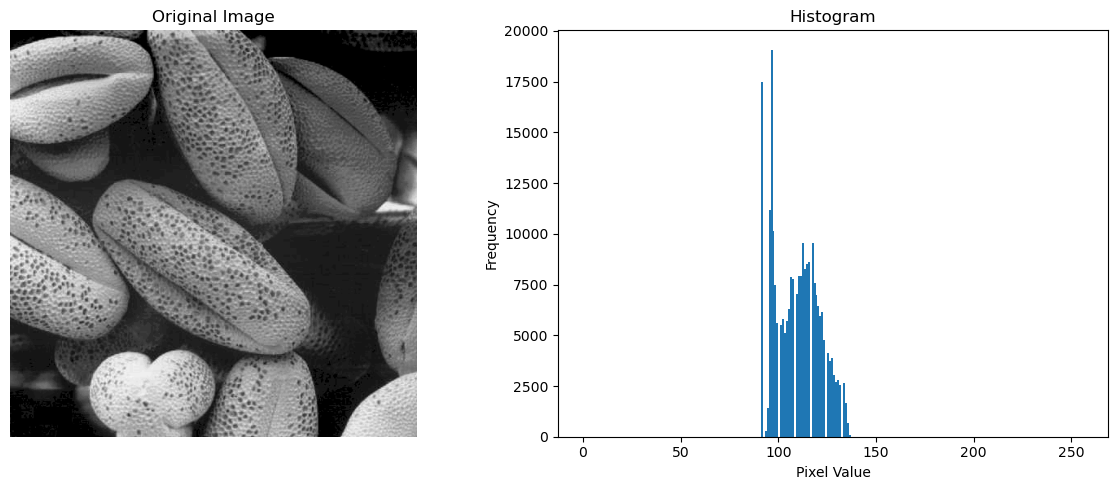

In [19]:
# PROBLEM 6.2 - HISTOGRAM ANALYSIS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img6, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(img6.ravel(), bins=256, range=[0, 256])
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### PROBLEM 6.3 Solution For The Problem
We apply histogram equalization to improve contrast in the image.
We apply log transformation to enhance details in darker regions of the image.

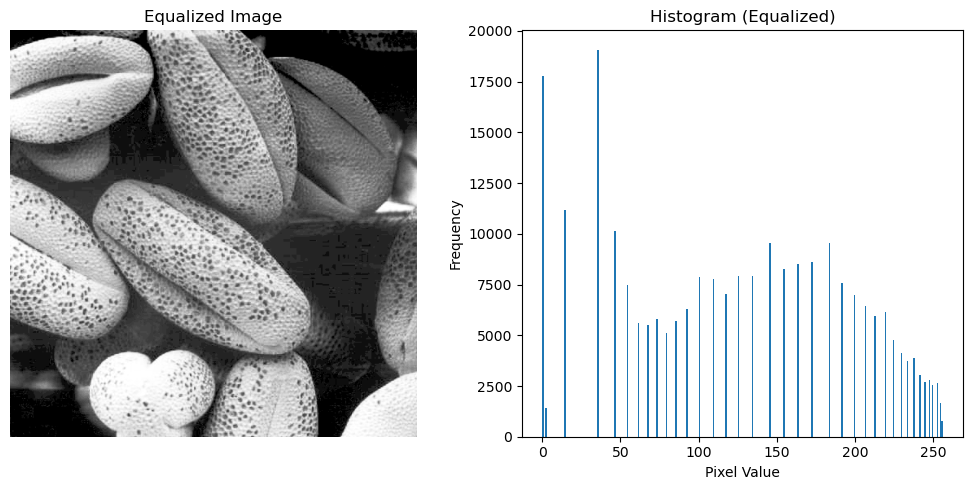

In [20]:
#PROBLEM 6.3.1 Histogram Equalization

img6_eq = cv2.equalizeHist(img6)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img6_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(img6_eq.ravel(), bins=256, range=[0, 256])
plt.title("Histogram (Equalized)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

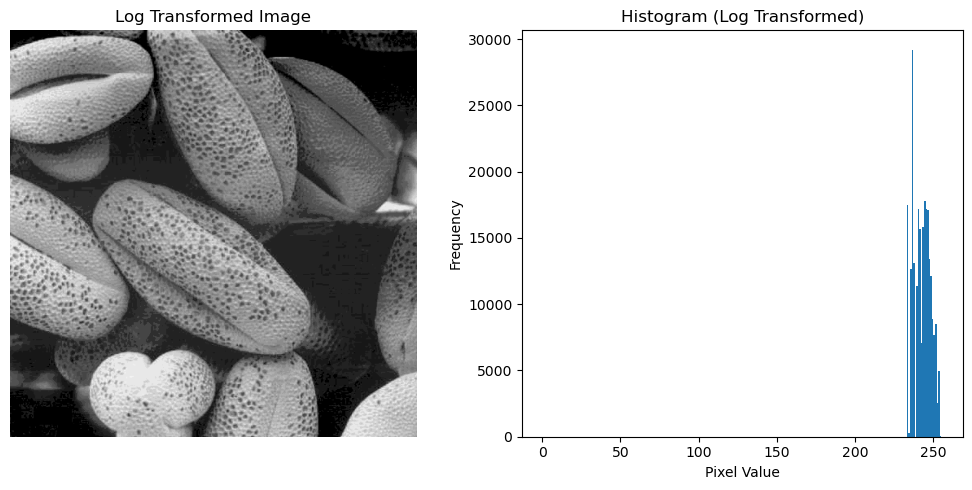

In [21]:
# PROBLEM 6.3.2 Log Transformation

def log_transform(image):
    c = 255 / np.log(1 + np.max(image))  
    log_image = c * np.log(1 + image.astype(np.float32))  
    return np.array(log_image, dtype=np.uint8)


img6_log = log_transform(img6)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img6_log, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(img6_log.ravel(), bins=256, range=[0, 256])
plt.title("Histogram (Log Transformed)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### PROBLEM 6.4 Explanation
The original photograph was of low contrast and contained restricted pixel intensity distribution.
Histogram Equalization stretched the histogram overall, increasing contrast.
Log transformation improved the details in dark regions by stretching low-intensity values further.
Compared to histogram equalization, log transformation is more appropriate for images with the majority of pixel values clustered in dark areas.